In [1]:
import pandas as pd
import numpy as np

In [2]:
df_all = pd.read_csv("D:\\datapool\\cs-training.csv")

df_all["test_cat1"] = pd.Series(np.random.randint(0,5,size=150000)).apply(lambda x:str(x)+"_test")
df_all["test_cat2"] = pd.Series(np.random.randint(0,10,size=150000)).apply(lambda x:str(x)+"_test")
df_all["test_cat3"] = pd.Series(np.random.randint(0,20,size=150000)).apply(lambda x:str(x)+"_test")
df_all["test_U"] = df_all["SeriousDlqin2yrs"]
df_all.loc[df_all["test_cat1"] == "0_test","test_cat1"] = np.nan
df_all.loc[df_all["test_cat2"] == "0_test","test_cat2"] = np.nan
df_all.loc[df_all["test_cat3"] == "0_test","test_cat3"] = np.nan


df_train = df_all.sample(frac = 0.7)
df_test = df_all[df_all.index.isin(df_train.index) == False]

x = df_train.drop([u'Unnamed: 0', u'SeriousDlqin2yrs'] , axis = 1)
y_column = u'SeriousDlqin2yrs'
y = df_train[u'SeriousDlqin2yrs']

x_test = df_test.drop([u'Unnamed: 0', u'SeriousDlqin2yrs'] , axis = 1)
#y_column = u'SeriousDlqin2yrs'
y_test = df_test[u'SeriousDlqin2yrs']


In [79]:
%run D:\gitstore\fy_scorecard.py

ximu = fs_scorecard(x,y,event = 1,workpath = "./")

#ximu.get_woe_iv()

ximu.columns_bin_dict["NumberOfTime30-59DaysPastDueNotWorse"] = [-np.inf,0,np.inf]
ximu.columns_bin_dict["NumberOfTime60-89DaysPastDueNotWorse"] = [-np.inf,0,np.inf]
ximu.columns_bin_dict["NumberOfTimes90DaysLate"] = [-np.inf,0,np.inf]

ximu.get_woe_iv()

ximu.woe_t.head()

FY Scorecard ready!
test_cat3 : too many values for discrete variables.


<string>:87: RuntimeWarning: divide by zero encountered in log


./woe_t.xlsx  generated;
 <name>.woe_t, <name>.iv_t available


,var_name,var_cat,cat_total_count,pos_count,neg_count,p_ni,p_y_total,odds,p_yi,woe,iv_i
0,RevolvingUtilizationOfUnsecuredLines,"(-inf, 0.0192]",21000,418,20582,0.210104,0.067038,0.020309,0.059383,-1.263587,0.190449
1,RevolvingUtilizationOfUnsecuredLines,"(0.0192, 0.0832]",21000,342,20658,0.210880,0.067038,0.016555,0.048586,-1.467944,0.238238
2,RevolvingUtilizationOfUnsecuredLines,"(0.0832, 0.27]",21000,612,20388,0.208124,0.067038,0.030018,0.086944,-0.872866,0.105773
3,RevolvingUtilizationOfUnsecuredLines,"(0.27, 0.699]",21000,1459,19541,0.199477,0.067038,0.074664,0.207274,0.038340,0.000299
4,RevolvingUtilizationOfUnsecuredLines,"(0.699, inf]",21000,4208,16792,0.171415,0.067038,0.250596,0.597812,1.249188,0.532650


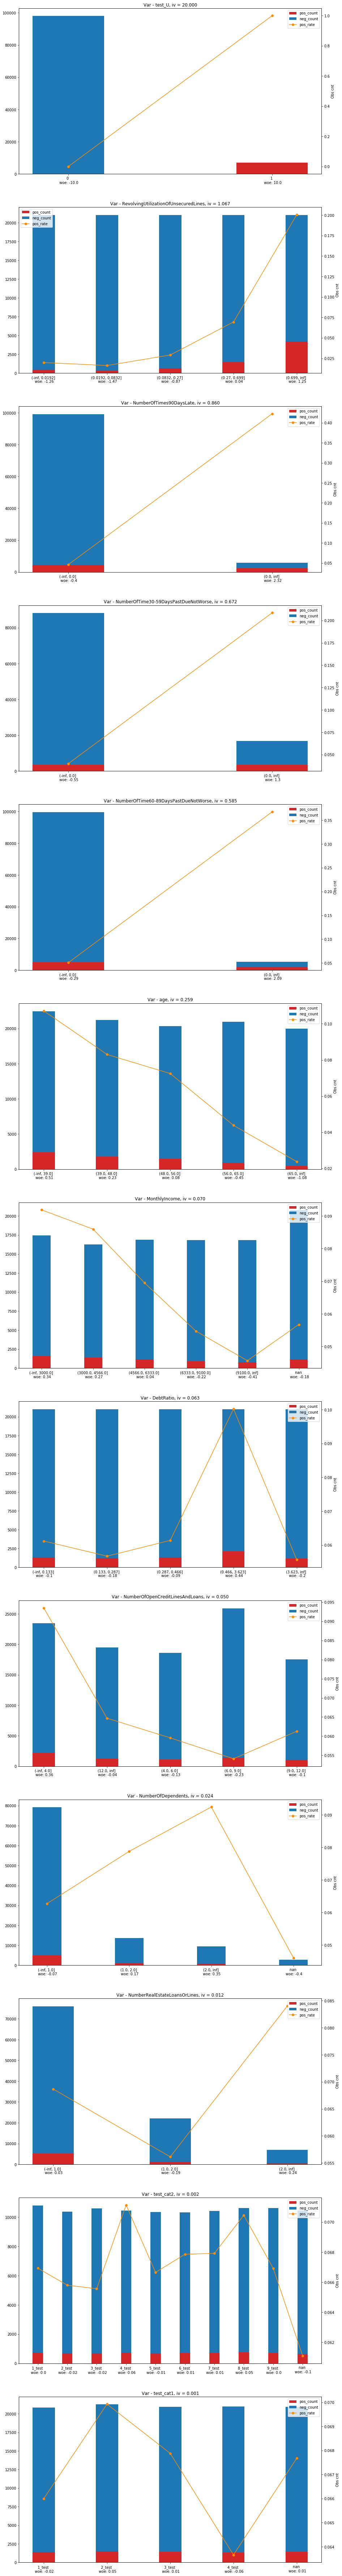

In [80]:
ximu.gen_woe_iv_plot()
ximu.woe_iv_plot

In [81]:
ximu.get_woe_replaced_df()

<name>.df_woe_replaced, <name>.df_binned available


In [82]:
excluded_columns = ["test_U","NumberOfDependents","test_cat1","test_cat2"
                    ,"NumberRealEstateLoansOrLines","NumberOfOpenCreditLinesAndLoans"]
ximu.gen_model(excluded_columns = excluded_columns)

Optimization terminated successfully.
         Current function value: 0.184215
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               105000
Model:                          Logit   Df Residuals:                   104992
Method:                           MLE   Df Model:                            7
Date:                Fri, 22 Sep 2017   Pseudo R-squ.:                  0.2509
Time:                        11:32:46   Log-Likelihood:                -19343.
converged:                       True   LL-Null:                       -25820.
                                        LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
DebtRatio                                0.7105      0.0

In [83]:
#需要变形
df_binned_test,df_woe_replaced_test = ximu.get_woe_replaced_df(x_test)

In [84]:
ximu.gen_score(score_base = 600, odds_change_rt = 20)

base_odds:  0.0718551260195
reverse_base_odds:  13.9168916039
base_rt:  20
base_score:  600
p:  28.8539008178
q:  524.024697799
DebtRatio
MonthlyIncome
NumberOfTime30-59DaysPastDueNotWorse
NumberOfTime60-89DaysPastDueNotWorse
NumberOfTimes90DaysLate
RevolvingUtilizationOfUnsecuredLines
age
__intercept
count    105000.000000
mean        620.649613
std          34.553968
min         476.320998
25%         601.639423
50%         629.649627
75%         645.651496
max         665.205818
Name: final_score, dtype: float64
<name>.df_scored, <name>.woe_t_scored available


In [85]:
ximu.df_scored.shape

(105000, 8)

In [86]:
x_scored_test = ximu.gen_score(x_test)

base_odds:  0.0718551260195
reverse_base_odds:  13.9168916039
base_rt:  20
base_score:  600
p:  28.8539008178
q:  524.024697799
DebtRatio
MonthlyIncome
NumberOfTime30-59DaysPastDueNotWorse
NumberOfTime60-89DaysPastDueNotWorse
NumberOfTimes90DaysLate
RevolvingUtilizationOfUnsecuredLines
age
__intercept
count    45000.000000
mean       620.691031
std         34.309314
min        476.320998
25%        601.599352
50%        629.511877
75%        645.627792
max        665.205818
Name: final_score, dtype: float64


In [88]:
ximu.model_evaluate()

ROC-(AUC = 0.86)
ks_value: 0.55
ks_position 5.0
<name>.roc_plot/ks_plot/lift_chart/score_dist_chart/lift_t available


In [57]:
ximu.model_evaluate(test_x = x_test,test_y = y_test)

ROC-(AUC = 0.86)
ROC_TEST-(AUC = 0.85)
ks_value: 0.55
ks_position 5.0
<name>.roc_plot/ks_plot/lift_chart/score_dist_chart/lift_t available


In [94]:
ximu.woe_t_scored

,var_name,var_cat,cat_total_count,pos_count,neg_count,p_ni,p_y_total,odds,p_yi,woe,iv_i,params,score
0,RevolvingUtilizationOfUnsecuredLines,"(-inf, 0.0192]",21000,418,20582,0.210104,0.067038,0.020309,0.059383,-1.263587,1.904486e-01,0.627185,22.866797
1,RevolvingUtilizationOfUnsecuredLines,"(0.0192, 0.0832]",21000,342,20658,0.210880,0.067038,0.016555,0.048586,-1.467944,2.382376e-01,0.627185,26.564980
2,RevolvingUtilizationOfUnsecuredLines,"(0.0832, 0.27]",21000,612,20388,0.208124,0.067038,0.030018,0.086944,-0.872866,1.057735e-01,0.627185,15.796021
3,RevolvingUtilizationOfUnsecuredLines,"(0.27, 0.699]",21000,1459,19541,0.199477,0.067038,0.074664,0.207274,0.038340,2.989129e-04,0.627185,-0.693824
4,RevolvingUtilizationOfUnsecuredLines,"(0.699, inf]",21000,4208,16792,0.171415,0.067038,0.250596,0.597812,1.249188,5.326502e-01,0.627185,-22.606219
5,age,"(-inf, 39.0]",22461,2406,20055,0.204724,0.067038,0.119970,0.341810,0.512590,7.026876e-02,0.469017,-6.936869
6,age,"(39.0, 48.0]",21235,1763,19472,0.198773,0.067038,0.090540,0.250462,0.231143,1.194747e-02,0.469017,-3.128046
7,age,"(48.0, 56.0]",20355,1475,18880,0.192730,0.067038,0.078125,0.209547,0.083658,1.406883e-03,0.469017,-1.132143
8,age,"(56.0, 65.0]",20980,920,20060,0.204775,0.067038,0.045862,0.130700,-0.449006,3.326012e-02,0.469017,6.076384
9,age,"(65.0, inf]",19969,475,19494,0.198998,0.067038,0.024366,0.067481,-1.081444,1.422276e-01,0.469017,14.635143


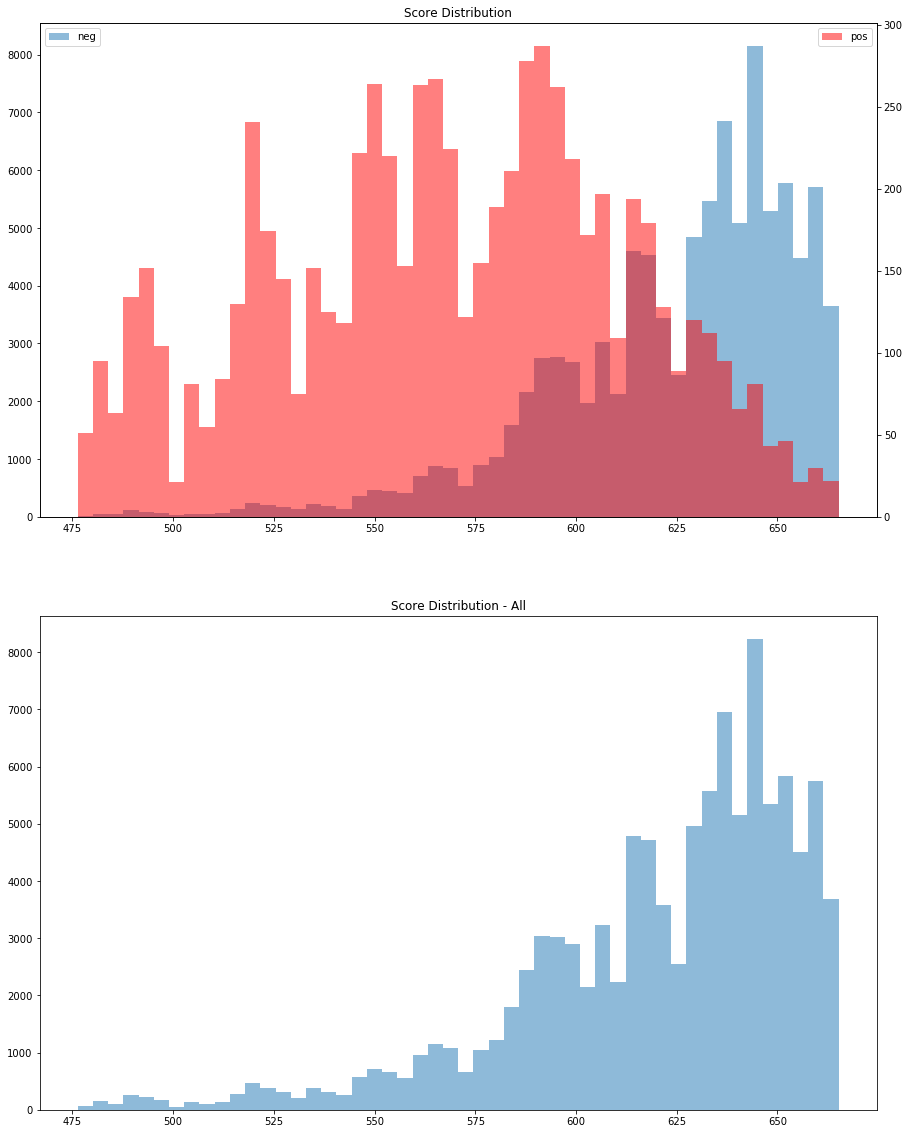

In [93]:
ximu.score_dist_chart

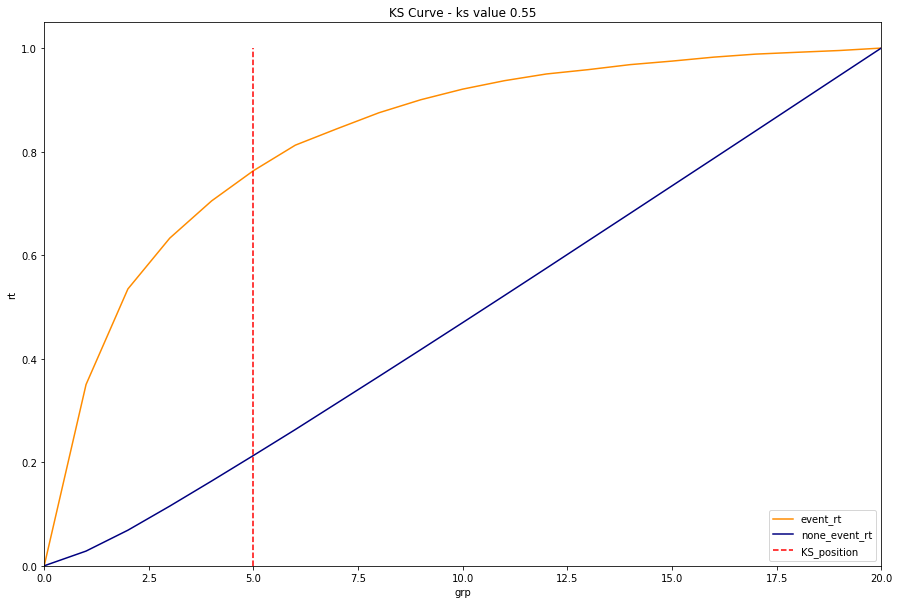

In [58]:
ximu.ks_plot

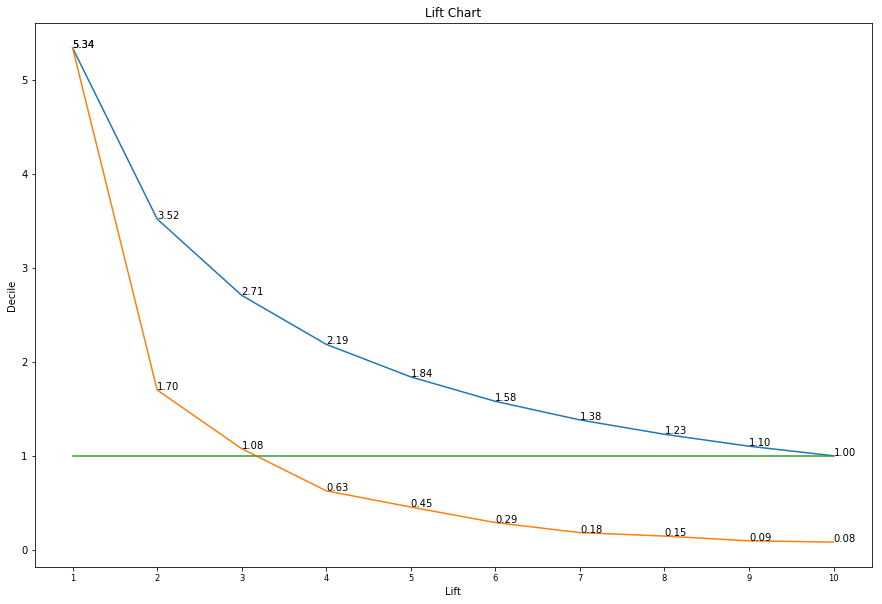

In [59]:
ximu.lift_chart

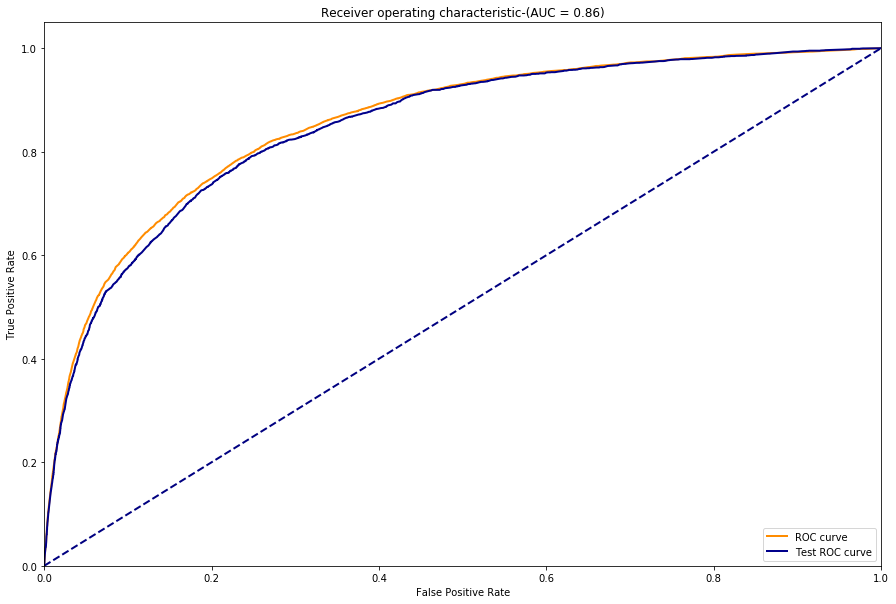

In [60]:
ximu.roc_plot

In [39]:
ximu.lift_t

,pos_cnt,total_cnt,pos_rt,score_max,score_min,cum_pos_cnt,cum_total_cnt,cum_pos_rt,decile_lift,cum_lift
score_rank,,,,,,,,,,
1.0,3765,10510,0.358230,575.610746,476.320998,3765,10510,0.358230,5.343682,5.343682
2.0,1199,10517,0.114006,594.416521,575.660333,4964,21027,0.236077,1.700614,3.521541
3.0,755,10468,0.072125,608.704931,594.430896,5719,31495,0.181584,1.075874,2.708674
4.0,443,10540,0.042030,619.309807,608.710199,6162,42035,0.146592,0.626962,2.186699
5.0,320,10511,0.030444,629.649627,619.346126,6482,52546,0.123359,0.454134,1.840127
6.0,205,10589,0.019360,636.946928,629.684724,6687,63135,0.105916,0.288787,1.579936
7.0,127,10413,0.012196,643.173923,637.014800,6814,73548,0.092647,0.181931,1.382005
8.0,101,10379,0.009731,649.129128,643.243800,6915,83927,0.082393,0.145159,1.229048
9.0,67,10575,0.006336,656.267777,649.161840,6982,94502,0.073882,0.094509,1.102090


In [ ]:
#排序性（提升图示例）
df_scored= ximu.df_scored.copy()

import math as mt
df_scored["score_rank"] = (df_scored["final_score"].rank(pct=True,ascending = True)*10).apply(mt.ceil)
df_test = pd.concat([df_scored["score_rank"],y.reset_index(drop=True),df_scored["final_score"]],axis = 1)
df_test_grp = df_test.groupby("score_rank")[y.name].agg([pd.Series.sum,pd.Series.count])
df_test_grp["pos_rt"] = df_test_grp["sum"] / df_test_grp["count"]
df_test_grp_2 = df_test.groupby("score_rank")["final_score"].agg([pd.Series.max,pd.Series.min])
df_test_grp_all = df_test_grp.merge(df_test_grp_2,left_index=True,
                                    right_index=True).rename(columns = {
    "sum":"pos_cnt",
    "count": "total_cnt",
    "max": "score_max",
    "min": "score_min"
})
df_test_grp_all["cum_pos_cnt"] = df_test_grp_all["pos_cnt"].cumsum()
df_test_grp_all["cum_total_cnt"] = df_test_grp_all["total_cnt"].cumsum()
df_test_grp_all["cum_pos_rt"] = df_test_grp_all["cum_pos_cnt"]/df_test_grp_all["total_cnt"].cumsum()
total_pos_rt = (df_test_grp_all["pos_cnt"].sum()+0.0)/df_test_grp_all["total_cnt"].sum()

df_test_grp_all["decile_lift"] = df_test_grp_all["pos_rt"]/total_pos_rt
df_test_grp_all["cum_lift"] = df_test_grp_all["cum_pos_rt"]/total_pos_rt

df_test_grp_all

In [ ]:
#排序性（提升图作图）
%matplotlib inline
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
plt.subplot(1,1,1)
fig.set_size_inches(15,10)
x_tick = df_test_grp_all.index
plt.plot(x_tick,df_test_grp_all["cum_lift"])
plt.plot(x_tick,df_test_grp_all["decile_lift"])
plt.plot(x_tick,[1]*df_test_grp_all.shape[0],label = "base_line")

for x,y in zip(x_tick,df_test_grp_all["cum_lift"]):
    plt.text(x,y,"%.2f" % y)

for x,y in zip(x_tick,df_test_grp_all["decile_lift"]):
    plt.text(x,y,"%.2f" % y)
    
plt.title("Lift Chart")
plt.xticks(range(1,11),size='small')

plt.xlabel("Lift")
plt.ylabel("Decile")
plt.legend()

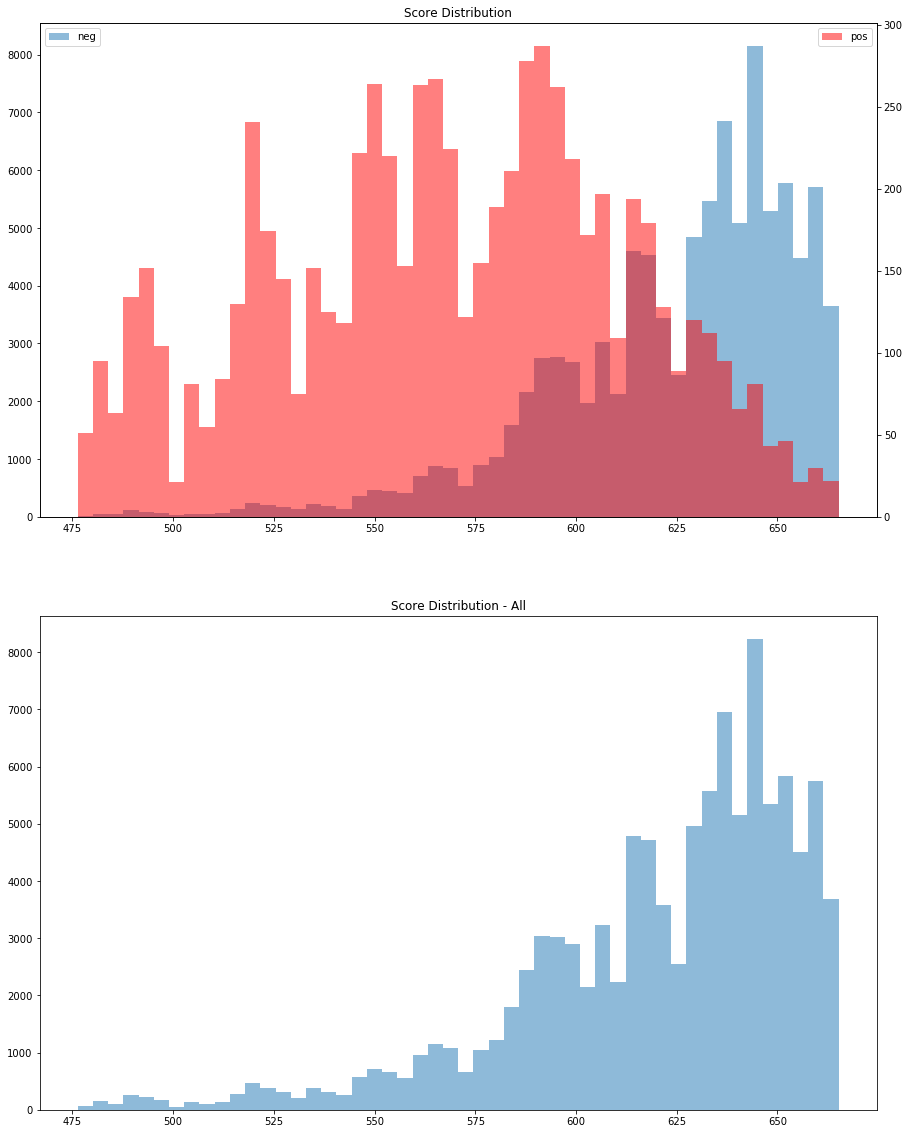

In [47]:
#Score Distribution
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,1)
fig.set_size_inches(15,20)

plt.subplot(2,1,1)
plt.title("Score Distribution")
h1 = plt.hist(ximu.df_scored[ximu.y_event == 0 ]["final_score"]
        ,histtype="stepfilled", bins=50, alpha=0.5, label = "neg")
plt.legend(loc = "upper left")
ax2 = plt.twinx()
h2 = plt.hist(ximu.df_scored[ximu.y_event == 1 ]["final_score"]
        ,histtype="stepfilled", color = "r", bins=50, alpha=0.5, label = "pos")

plt.xlabel("Score")
plt.xlabel("Obs cnt")
ax2.legend(loc = "upper right")

plt.subplot(2,1,2)
plt.title("Score Distribution - All")
plt.hist(ximu.df_scored["final_score"]
        ,histtype="stepfilled", bins=50, alpha=0.5, label = "total")

plt.show()

In [15]:
ximu.df_scored.columns

Index([u'DebtRatio', u'MonthlyIncome', u'NumberOfTime30-59DaysPastDueNotWorse',
       u'NumberOfTime60-89DaysPastDueNotWorse', u'NumberOfTimes90DaysLate',
       u'RevolvingUtilizationOfUnsecuredLines', u'age', u'final_score'],
      dtype='object')

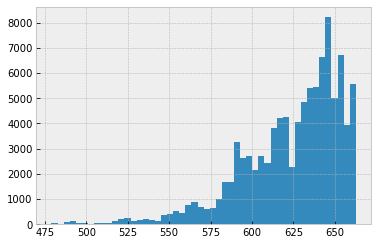

In [231]:
ximu.df_scored[ximu.y_event == 0 ]["final_score"].hist(bins = 50)

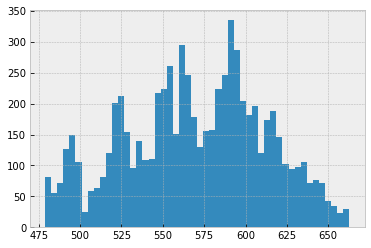

In [232]:
ximu.df_scored[ximu.y_event == 1 ]["final_score"].hist(bins = 50)

In [90]:
h1[0][0]

34.0

In [44]:
print plt.subplots.__doc__


    Create a figure and a set of subplots

    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.

    Parameters
    ----------
    nrows, ncols : int, optional, default: 1
        Number of rows/columns of the subplot grid.

    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (`sharex`) or y (`sharey`)
        axes:

            - True or 'all': x- or y-axis will be shared among all
              subplots.
            - False or 'none': each subplot x- or y-axis will be
              independent.
            - 'row': each subplot row will share an x- or y-axis.
            - 'col': each subplot column will share an x- or y-axis.

        When subplots have a shared x-axis along a column, only the x tick
        labels of the bottom subplot are visible.  Similarly, when subplots
        have a shared y-axis along a row, only th

In [160]:
ximu.df_woe_replaced.corr().to_excel("corr.xlsx")

In [152]:
print plt.plot.__doc__

Plot lines and/or markers to the
:class:`~matplotlib.axes.Axes`.  *args* is a variable length
argument, allowing for multiple *x*, *y* pairs with an
optional format string.  For example, each of the following is
legal::

    plot(x, y)        # plot x and y using default line style and color
    plot(x, y, 'bo')  # plot x and y using blue circle markers
    plot(y)           # plot y using x as index array 0..N-1
    plot(y, 'r+')     # ditto, but with red plusses

If *x* and/or *y* is 2-dimensional, then the corresponding columns
will be plotted.

If used with labeled data, make sure that the color spec is not
included as an element in data, as otherwise the last case
``plot("v","r", data={"v":..., "r":...)``
can be interpreted as the first case which would do ``plot(v, r)``
using the default line style and color.

If not used with labeled data (i.e., without a data argument),
an arbitrary number of *x*, *y*, *fmt* groups can be specified, as in::

    a.plot(x1, y1, 'g^', x2, y2, 'g-

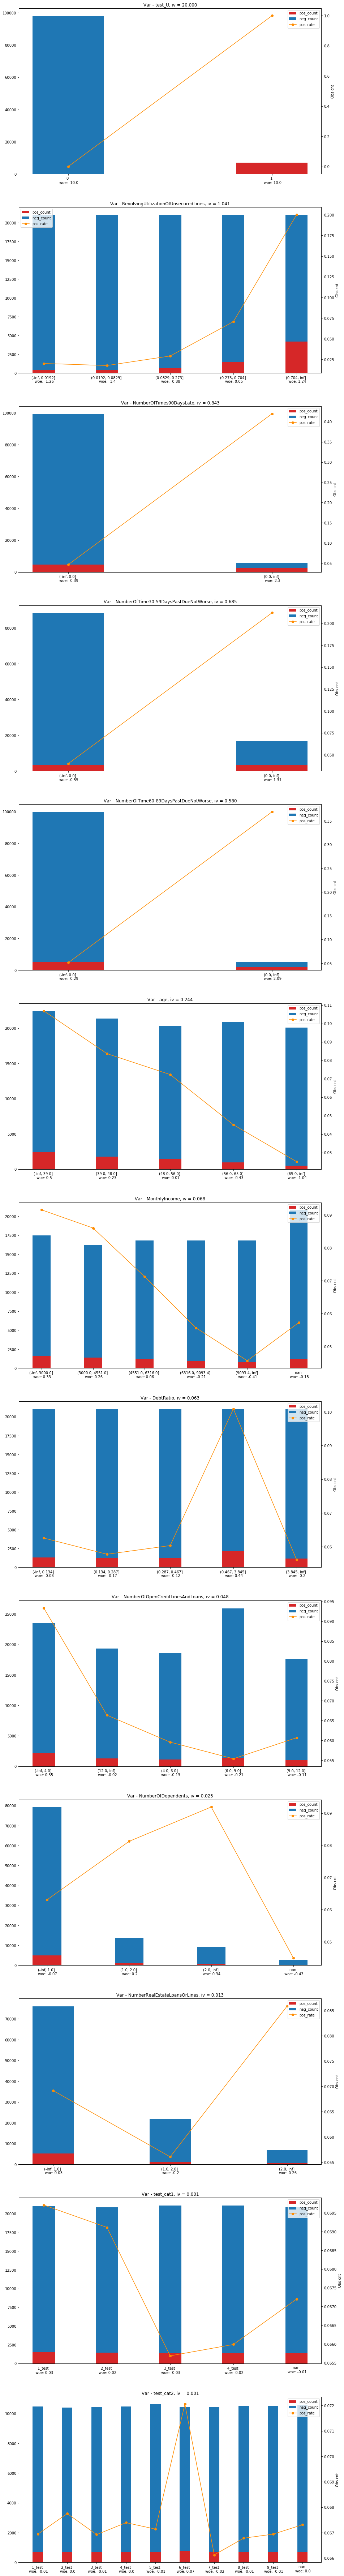

In [154]:
woe_t = ximu.woe_t
iv_t = ximu.iv_t

var_cnt = iv_t.shape[0]
woe_iv_plot,axes = plt.subplots(nrows = var_cnt,ncols = 1)
woe_iv_plot.set_size_inches(15,10 * var_cnt)
ax_cnt = 0

for i in iv_t.sort_values(by = "iv" ,ascending=False)["var_name"]:
    plt.subplot(var_cnt , 1 , ax_cnt+1)
    woe_t_sample = woe_t[woe_t["var_name"]==i]
    iv_value = iv_t[iv_t["var_name"]==i]["iv"].round(3).iloc[0]
    
    ind = np.arange(woe_t_sample.shape[0])    # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence
            
    p1 = plt.bar(ind, woe_t_sample["pos_count"], width, color='#d62728')
    p2 = plt.bar(ind, woe_t_sample["neg_count"], width, bottom=woe_t_sample["pos_count"])
    plt.twinx()
    p3 = plt.plot(ind,woe_t_sample["pos_count"]/woe_t_sample["cat_total_count"],'o-',color = "darkorange")
    plt.ylabel('Obs cnt')
    plt.title("Var - %s, iv = %.3f" % (i,iv_value))
    xticks = woe_t_sample["var_cat"]+" \n woe: " + woe_t_sample["woe"].round(2).astype("string")
    plt.xticks(ind, xticks)
    plt.legend((p1[0], p2[0],p3[0]), ('pos_count', 'neg_count','pos_rate'))
    re = plt.setp(axes[ax_cnt].get_xticklabels(),rotation = 30 ,horizontalalignment = "right")
    ax_cnt = ax_cnt+1

In [175]:
iv_lower_bound = 0.02
iv_upper_bound = 20

columns_iv = ximu.iv_t[(ximu.iv_t["iv"]>=iv_lower_bound) & (ximu.iv_t["iv"]<=iv_upper_bound)]["var_name"]
x = ximu.df_woe_replaced[columns_iv].drop(excluded_columns,axis = 1,errors = "ignore").reset_index(drop = True)
y = ximu.y.copy().reset_index(drop = True)
y[y==ximu.event] = 1
y[y<>ximu.event] = 0
ximu.y_event = y
x["__intercept"] = 1
ximu.model = sm.Logit(endog=y , exog=x)
ximu.model_result = ximu.model.fit()
print ximu.model_result.summary()

Optimization terminated successfully.
         Current function value: 0.185833
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               105000
Model:                          Logit   Df Residuals:                   104991
Method:                           MLE   Df Model:                            8
Date:                Tue, 19 Sep 2017   Pseudo R-squ.:                  0.2483
Time:                        17:46:34   Log-Likelihood:                -19512.
converged:                       True   LL-Null:                       -25957.
                                        LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
DebtRatio                                0.7312      0.0

In [171]:
#print sm.add_constant.__doc__

ximu.model.exog


array([[-0.19686326,  0.32953008,  0.35196953, ..., -1.26176041,
         0.5015958 ,  1.        ],
       [-0.0816197 ,  0.05770192,  0.35196953, ..., -1.3957865 ,
        -0.42823694,  1.        ],
       [-0.16671642, -0.20511234, -0.01890656, ..., -1.3957865 ,
        -1.03579748,  1.        ],
       ..., 
       [ 0.43747526,  0.05770192, -0.01890656, ..., -1.26176041,
        -1.03579748,  1.        ],
       [-0.19686326, -0.17603425, -0.21143627, ...,  0.04944347,
         0.5015958 ,  1.        ],
       [-0.19686326, -0.17603425, -0.13417043, ..., -1.26176041,
        -0.42823694,  1.        ]])